In [1]:
import numpy as np
import matplotlib.pyplot as plt
import python_alternative
from fixedpoint import FixedPoint
import mand

In [14]:
# frame parameters
WIDTH = 25
ASPECT_RATIO = 4 / 3
MAND_WIDTH = 3.4
MAX_ITTERATIONS = 5

HEIGHT = round(WIDTH / ASPECT_RATIO)
MAND_HEIGHT = MAND_WIDTH / ASPECT_RATIO

START_X = -0.65 - MAND_WIDTH / 2
START_Y = 0 + MAND_HEIGHT / 2

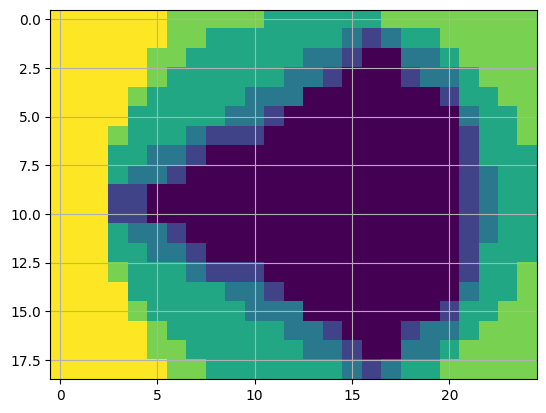

In [15]:

final_image = np.zeros((HEIGHT, WIDTH), dtype=np.uint8)
image_coords = [[(0, 0) for _ in range(WIDTH) ] for _ in range(HEIGHT)]

for row in range(HEIGHT):
    for col in range(WIDTH):
        x = START_X + col * MAND_WIDTH / WIDTH
        y = START_Y - row * MAND_HEIGHT / HEIGHT

        itterations = mand.calculate_mandelbrot(x, y, MAX_ITTERATIONS)
        image_coords[row][col] = (x, y, itterations * MAX_ITTERATIONS)

        final_image[row, col] = 255 - itterations * 255
        

plt.imshow(final_image)
plt.grid()
plt.show()


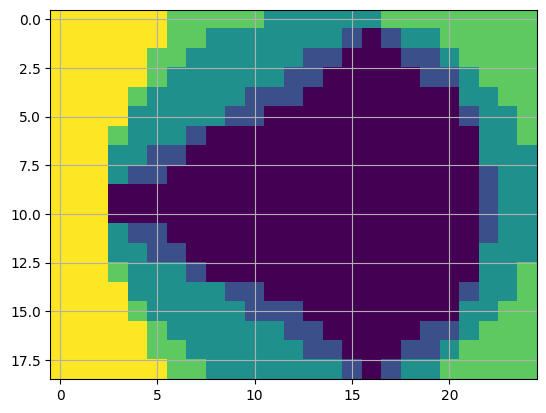

In [30]:
INTEGER_SIZE = 4
FRACTION_SIZE = 12


final_image = np.zeros((HEIGHT, WIDTH), dtype=np.uint8)
image_coords = [[0 for _ in range(WIDTH) ] for _ in range(HEIGHT)]


for row in range(HEIGHT):
    for col in range(WIDTH):
        x = START_X + col * MAND_WIDTH / WIDTH
        y = START_Y - row * MAND_HEIGHT / HEIGHT

        x_f = FixedPoint(x, signed=1, m=INTEGER_SIZE, n=FRACTION_SIZE)
        y_f = FixedPoint(y, signed=1, m=INTEGER_SIZE, n=FRACTION_SIZE)

        itterations = python_alternative.mandelbrot_core(x_f, y_f, MAX_ITTERATIONS)
        image_coords[row][col] = (str(x_f), str(y_f), itterations)

        final_image[row, col] = (1 - itterations / MAX_ITTERATIONS) * 255
        


plt.imshow(final_image)
plt.grid()
plt.show()


In [42]:
PIXEL_COORD = (5, 11)

print("Result: ", final_image[PIXEL_COORD[0], PIXEL_COORD[1]])
print("Coordinates: ", image_coords[PIXEL_COORD[0]][PIXEL_COORD[1]], MAX_ITTERATIONS)

Result:  0
Coordinates:  ('f256', '09aa', 5) 5
